In [90]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

In [91]:
tf.__version__

'2.7.0'

In [92]:
data = pd.read_csv("Churn_Modelling.csv")

In [93]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
X = data.iloc[:,3:-1].values
y = data.iloc[:,-1]

In [95]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

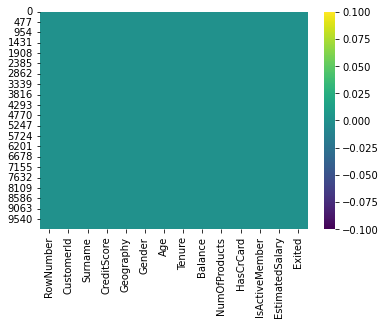

In [96]:
sns.heatmap(data.isnull(),cmap = "viridis")

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()

In [99]:
X[:,2] = le.fit_transform(X[:,2])

In [100]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [101]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [("encoder",OneHotEncoder(),[1])],remainder = "passthrough")

In [102]:
X = np.array(ct.fit_transform(X))

In [103]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
ann = tf.keras.models.Sequential()
# adding the input layer

In [108]:
ann.add(tf.keras.layers.Dense(units = 6,activation = "relu"))
# rectifier activation function has been added in first hidden layer

In [109]:
ann.add(tf.keras.layers.Dense(units = 6,activation = "relu"))
# Added the second hidden layer

In [110]:
ann.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid"))
# Added the output layer

In [111]:
# Compile the ann
ann.compile(optimizer = "adam" ,loss = "binary_crossentropy" ,metrics = ["accuracy"] )
# Had the output not been binary, the loss function would have been categorical_crossentropy, and activation not be sigmoid, but softmax

In [112]:
ann.fit(X_train,y_train,batch_size = 32,epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5880 - accuracy: 0.7191
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7971
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8054
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8152
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8288
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8404
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8470
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8516
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8530
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3565 - accura

In [113]:
y_pred = ann.predict(X_test)
y_pred = y_pred>0.5

In [114]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [118]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [119]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1512   83]
 [ 200  205]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.51      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

0.8585
